# Simple Linear Regression Model for detecting patterns in data


## Imports and Setup:

The necessary libraries are imported


In [47]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Define our data sets and set known parameters


In [48]:
# Define our known parameters
weight = 0.9
bias = 3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

## Data Splitting:

The prepared data is split into training and testing sets.


In [49]:
def split_data(X, y, train_ratio=0.8):
    num_samples = len(X)
    index = int(train_ratio * num_samples)
    X_train, y_train = X[:index], y[:index]
    X_test, y_test = X[index:], y[index:]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = split_data(X, y)

## Visualization:

The plot_predictions function is defined to visualize our training and testing data.


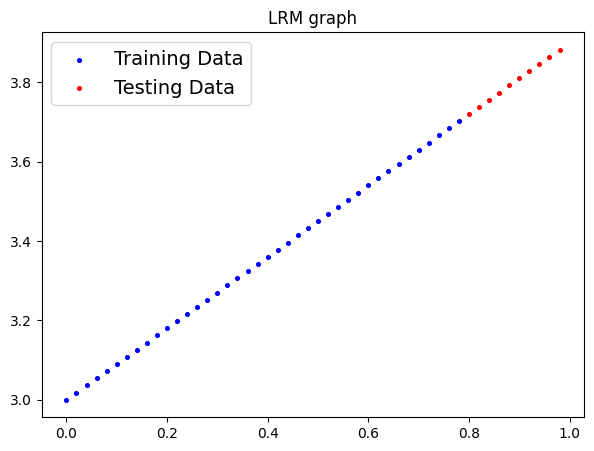

In [50]:
def plot_predictions(
    test_data=None,
    test_labels=None,
    train_data=None,
    train_labels=None,
    predictions=None,
):
    plt.figure(figsize=(7, 5))

    if train_data is not None and train_labels is not None:
        plt.scatter(train_data, train_labels, c="blue", label="Training Data", s=7)

    if test_data is not None and test_labels is not None:
        plt.scatter(test_data, test_labels, c="red", label="Testing Data", s=7)

    if predictions is not None and test_labels is not None:
        plt.scatter(test_data, predictions, c="green", label="Prediction", s=7)

    plt.title("LRM graph")
    plt.legend(prop={"size": 14})


plot_predictions(X_test, y_test, X_train, y_train)

## Model Definition and Training:

The neural network model and training process are defined.


In [51]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        # Define our model parameters
        self.weights = nn.Parameter(torch.randn(1, 1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):  # Function to define our model's computation
        return self.weights * x + self.bias  # Our Linear regression function


model = Network()

# Define our loss function
loss_fn = nn.MSELoss()

# Define our optimiser
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# Our function to train the model
def train_model(model, X_train, y_train, loss_fn, optimizer, num_epochs=5000):
    # Set the model into training mode
    model.train()

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X_train)

        # Calculate the loss
        loss = loss_fn(y_pred, y_train)
        # print(loss)

        # Back propagation
        optimizer.zero_grad()

        loss.backward()
        # Update model parameters
        optimizer.step()


train_model(model, X_train, y_train, loss_fn, optimizer, num_epochs=5000)

## Model Evaluation and Visualization:

The trained model is evaluated and its predictions are visualized.


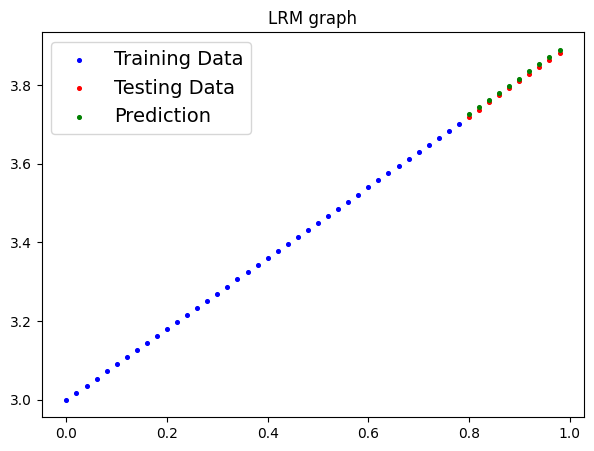

In [52]:
model.eval()  # Put our model into evaluation mode
with torch.inference_mode():
    output = model(X_test)
    # loss = loss_fn(output, y_test)

plot_predictions(
    test_data=X_test,
    test_labels=y_test,
    train_data=X_train,
    train_labels=y_train,
    predictions=output,
)